# **계층적 군집화 (Hierarchical clustering)**

# **1.Hierarchical clustering 이란?**

- #### **데이터의 군집을 계층적인 구조로 구성하는 방법으로, 덴드로그램(dendrogram)이라고 불리는 트리 형태를 조직화하여 군집을 형성**
- #### **상향식 군집화 :  개별적인 데이터 포인트를 자체 클러스터로 간주하여, 가장 가까운 두 클러스터를 반복적으로 병합하여 단일 클러스터가 될 때까지 반복**
- #### **하향식 군집화 :  모든 데이터를 하나의 군집으로 시작한 후, 점진적으로 데이터를 분할하여 작은 군집을 만들어가는 방식**

# **2.실습**

## **2-1.필요한 라이브러리 임포트**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 정규화 패키지
from sklearn.preprocessing import StandardScaler

# 군집분석 관련 패키지
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score

# 차원축소를 위한 패키지
from sklearn.manifold import TSNE

## **2-2. 데이터셋 설명 (Iris dataset)**
- **X 변수: 꽃의 형태학적 특성을 나타내는 4개의 수치형 변수**
- **Y 변수: 꽃의 종류를 나타내는 1개의 카테고리형 변수 (3개 클래스: : Setosa(0) / Versicolor(1) / Virginica(2))**

## **2-3.데이터 로드 및 전처리**

In [14]:
# Iris 데이터셋 로드
iris_df = pd.read_csv("../Data/iris_data.csv")
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
# 데이터 스케일링
X = iris_df.iloc[:, :-1]
y = iris_df.iloc[:, -1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## **2-4.군집의 수 설정**

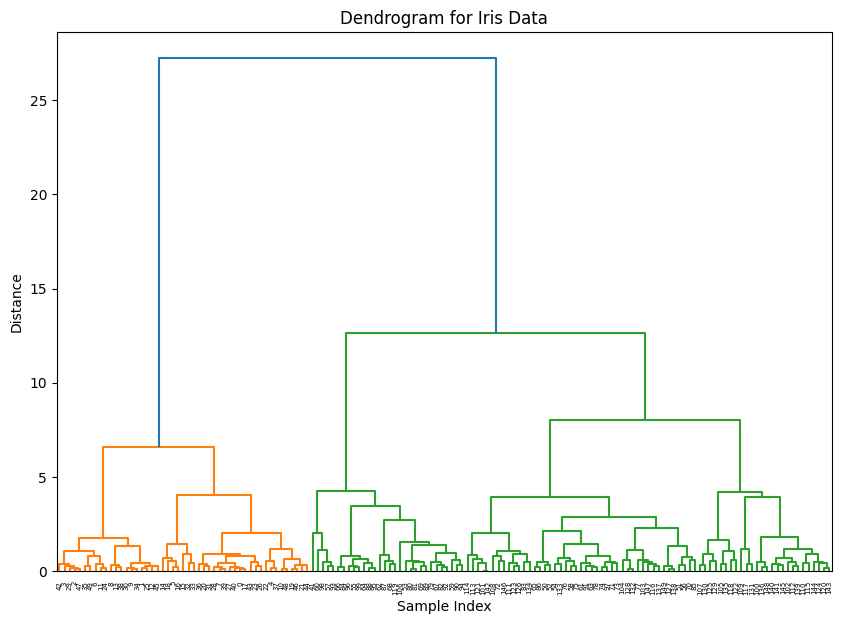

In [ ]:
# 덴드로그램 생성
plt.figure(figsize=(10, 7))
Z = linkage(X_scaled, method="ward")
dendrogram(Z)
plt.title("Dendrogram for Iris Data")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

In [ ]:
# AgglomerativeClustering 모델 생성 및 학습
model_iris = AgglomerativeClustering(n_clusters=5)  # 5개의 클러스터로 설정 -> // 이후 덴드로그램의 결과를 반영하여 군집의 수를 조정//
model_iris.fit(X_scaled)  # 표준화된 데이터를 사용하여 모델 학습

# 예측한 클러스터 레이블 추출
clusters = model_iris.labels_

## **2-5.T-sne을 사용**
- **고차원 데이터는 사람이 해석하기 어려움**
- **t-SNE (t-distributed Stochastic Neighbor Embedding)는 국소 구조(local structure)를 유지하며 고차원 데이터를 저차원 공간으로 투영하여 시각화하는데 용이함**

In [ ]:
# t-SNE를 사용하여 2차원으로 축소
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)  # 표준화된 데이터를 입력으로 사용

## **2-6.시각화**

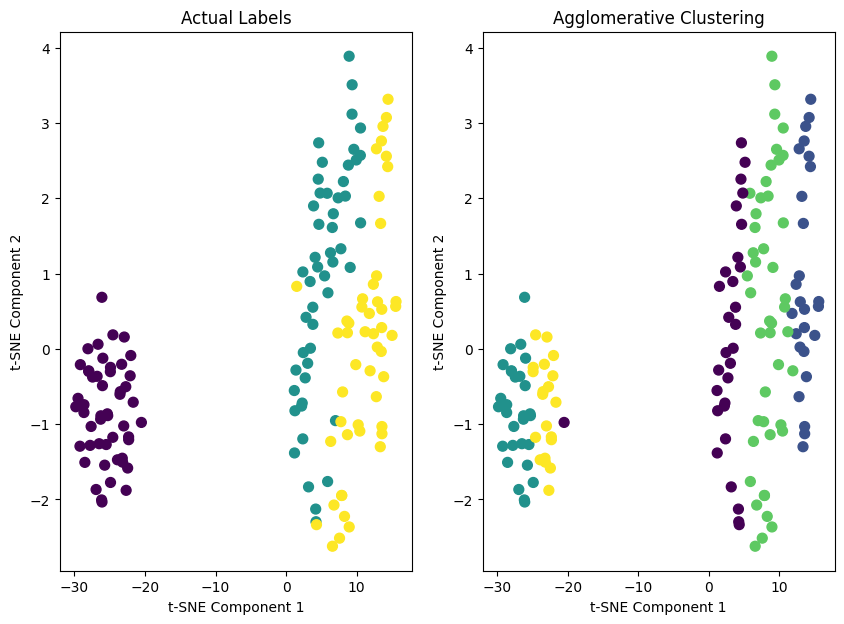

In [31]:
# 시각화
plt.figure(figsize=(10, 7))

# 실제 레이블에 따른 시각화
plt.subplot(1, 2, 1)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap="viridis", s=50)
plt.title("Actual Labels")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")

# AgglomerativeClustering 결과에 따른 시각화
plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap="viridis", s=50)
plt.title("Agglomerative Clustering")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")

plt.show()

## **2-7.결과 평가**

In [32]:
# Silhouette Score: 군집 품질 평가
silhouette = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {silhouette:.3f}")

Silhouette Score: 0.331


# **3.실습(shadowing)**

## **3-1. 데이터셋 설명 (Wine dataset)**
- **X 변수: 와인의 화학적 특성을 나타내는 13개의 수치형 변수**
- **Y 변수: 와인의 종류를 나타내는 1개의 카테고리형 변수 (3개 클래스: (0) / (1) / (2))**

## **3-2.데이터 로드 및 전처리**

In [ ]:
# 와인 데이터셋 로드
wine_df = pd.read_csv("../Data/wine_data.csv")
wine_df.head()

In [ ]:
# 데이터 스케일링
X = wine_df.iloc[:, :-1]
y = wine_df.iloc[:, -1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## **2-4.군집의 수 설정**

In [ ]:
# 덴드로그램 생성
plt.figure(figsize=(10, 7))
Z = linkage(X_scaled, method="ward")
dendrogram(Z)
plt.title("Dendrogram for Wine Data")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

In [ ]:
# AgglomerativeClustering 모델 생성 및 학습
model_iris = AgglomerativeClustering(n_clusters=5)  # 3개의 클러스터로 설정
model_iris.fit(X_scaled)  # 표준화된 데이터를 사용하여 모델 학습

# 예측한 클러스터 레이블 추출
clusters = model_iris.labels_

## **2-5.T-sne을 사용**

In [ ]:
# t-SNE를 사용하여 2차원으로 축소
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)  # 표준화된 데이터를 입력으로 사용

## **2-6.시각화**

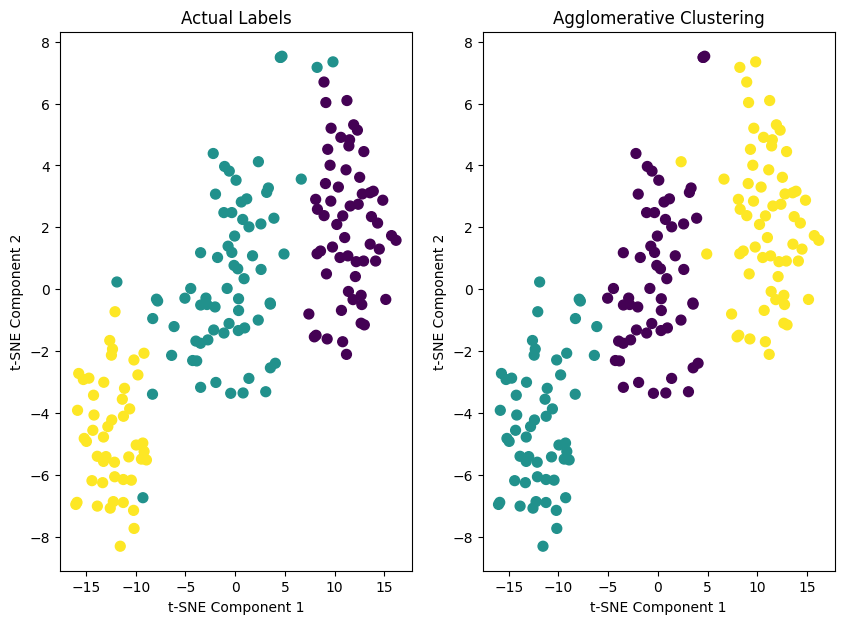

In [49]:
# 시각화
plt.figure(figsize=(10, 7))

# 실제 레이블에 따른 시각화
plt.subplot(1, 2, 1)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap="viridis", s=50)
plt.title("Actual Labels")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")

# AgglomerativeClustering 결과에 따른 시각화
plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap="viridis", s=50)
plt.title("Agglomerative Clustering")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")

plt.show()

## **2-7.결과 평가**

In [50]:
# Silhouette Score: 군집 품질 평가
silhouette = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {silhouette:.3f}")

Silhouette Score: 0.277
